In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import scipy.stats as st
from scipy.stats import linregress

pd.options.mode.chained_assignment = None

# Loading .csv file from Resources folder
nba_data = os.path.join("nba-forecasts", "nbaallelo.csv")

# Reading purchase data file and storing in a DataFrame
nba_data = pd.read_csv(nba_data, encoding="ISO-8859-1")

In [2]:
nba_data.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [3]:
nba_data.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [4]:
nba_data.columns.to_list()

['gameorder',
 'game_id',
 'lg_id',
 '_iscopy',
 'year_id',
 'date_game',
 'seasongame',
 'is_playoffs',
 'team_id',
 'fran_id',
 'pts',
 'elo_i',
 'elo_n',
 'win_equiv',
 'opp_id',
 'opp_fran',
 'opp_pts',
 'opp_elo_i',
 'opp_elo_n',
 'game_location',
 'game_result',
 'forecast',
 'notes']

In [5]:
nba_data["team_id"].unique()

array(['TRH', 'NYK', 'CHS', 'DTF', 'WSC', 'BOS', 'PRO', 'PIT', 'STB',
       'CLR', 'PHW', 'BLB', 'INJ', 'FTW', 'MNL', 'ROC', 'TRI', 'DNN',
       'INO', 'SHE', 'WAT', 'AND', 'SYR', 'MLH', 'STL', 'DET', 'CIN',
       'LAL', 'CHP', 'CHZ', 'SFW', 'BAL', 'PHI', 'CHI', 'SEA', 'OAK',
       'ANA', 'SDR', 'KEN', 'INA', 'DNR', 'DLC', 'HSM', 'NOB', 'MNM',
       'NJA', 'PTP', 'ATL', 'MIL', 'PHO', 'NYA', 'MMF', 'MNP', 'LAS',
       'CAR', 'WSA', 'BUF', 'CLE', 'UTS', 'FLO', 'PTC', 'POR', 'VIR',
       'TEX', 'MMP', 'HOU', 'GSW', 'KCO', 'MMT', 'SDA', 'CAP', 'SAA',
       'NOJ', 'DNA', 'SSL', 'MMS', 'WSB', 'KCK', 'SDS', 'IND', 'NYN',
       'DEN', 'SAS', 'NJN', 'SDC', 'UTA', 'DAL', 'LAC', 'SAC', 'CHH',
       'MIA', 'MIN', 'ORL', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA',
       'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [6]:
team_data = nba_data.loc[nba_data["team_id"] == "CHI"]

In [7]:
team_data["pt_diff"] = team_data["pts"] - team_data["opp_pts"]
team_data.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,pt_diff
14296,7149,196610150STL,NBA,1,1967,10/15/1966,1,0,CHI,Bulls,...,STL,Hawks,97,1513.9475,1494.6462,A,W,0.140974,NaN,7
14298,7150,196610180CHI,NBA,0,1967,10/18/1966,2,0,CHI,Bulls,...,SFW,Warriors,116,1472.2821,1465.5607,H,W,0.424340,NaN,3
14307,7154,196610190CHI,NBA,0,1967,10/19/1966,3,0,CHI,Bulls,...,LAL,Lakers,124,1551.9189,1536.3716,H,W,0.326355,NaN,10
14309,7155,196610200CHI,NBA,0,1967,10/20/1966,4,0,CHI,Bulls,...,SFW,Warriors,121,1465.5607,1475.0408,H,L,0.465530,at San Jose CA,-10
14314,7158,196610210LAL,NBA,1,1967,10/21/1966,5,0,CHI,Bulls,...,LAL,Lakers,101,1536.3716,1517.4205,A,W,0.147847,NaN,7


In [8]:
team_wl_table = team_data.groupby(["year_id"])["game_result"].value_counts()
team_df = team_wl_table.to_frame().rename(columns={"game_result":"result_count"}).reset_index()

In [9]:
w_count = team_df[team_df["game_result"] == "W"]
l_count = team_df[team_df["game_result"] == "L"]

wl_df = w_count.merge(l_count, how="inner", on="year_id").drop(columns=["game_result_x", "game_result_y"]).rename(columns={"result_count_x": "W", "result_count_y": "L"})

In [10]:
team_pts_df = team_data.groupby(["year_id"])["pts"].sum().to_frame().reset_index()
opp_pts_df = team_data.groupby(["year_id"])["opp_pts"].sum().to_frame().reset_index()

pts_df = team_pts_df.merge(opp_pts_df, how="inner", on="year_id")

In [11]:
team_elo_table = team_data.groupby(["year_id"])["elo_i"].mean()
team_elo_df = team_elo_table.to_frame().reset_index()

opp_elo_table = team_data.groupby(["year_id"])["opp_elo_i"].mean()
opp_elo_df = opp_elo_table.to_frame().reset_index()

In [12]:
pt_diff_table = team_data.groupby(["year_id"])["pt_diff"].mean()
pt_diff_df = pt_diff_table.to_frame().reset_index()

In [13]:
team_forecast = team_data.groupby(["year_id"])["forecast"].mean()
team_forecast_df = team_forecast.to_frame().reset_index()

In [14]:
stats_table = wl_df.merge(pts_df, how="inner", on="year_id")
gm_count = stats_table["W"] + stats_table["L"]
stats_table["pts_pg"] = round((stats_table["pts"] / gm_count),2)
stats_table["opp_pts_pg"] = round((stats_table["opp_pts"] / gm_count),2)
stats_table["pt_diff_pg"] = round((pt_diff_df["pt_diff"]),2)
stats_table["elo_pg"] = round((team_elo_df["elo_i"]),2)
stats_table["opp_elo_pg"] = round((opp_elo_df["opp_elo_i"]),2)
stats_table["avg_win_prob"] = round((team_forecast_df["forecast"]),4)
stats_table["pts"] = stats_table["pts"].map('{:,.0f}'.format)
stats_table["opp_pts"] = stats_table["opp_pts"].map('{:,.0f}'.format)
stats_table.head()

,year_id,W,L,pts,opp_pts,pts_pg,opp_pts_pg,pt_diff_pg,elo_pg,opp_elo_pg,avg_win_prob
0,1967,33,51,"9,480","9,816",112.86,116.86,-4.00,1348.93,1497.92,0.3502
1,1968,30,57,"9,479","9,843",108.95,113.14,-4.18,1354.53,1468.04,0.3765
2,1969,33,49,"8,587","8,772",104.72,106.98,-2.26,1378.98,1449.12,0.4191
3,1970,40,47,"9,977","10,159",114.68,116.77,-2.09,1406.18,1464.06,0.4320
4,1971,54,35,"9,782","9,368",109.91,105.26,4.65,1518.07,1453.24,0.5864


In [15]:
stats_table.to_html(buf="output_data/stats_table.html", index=False)

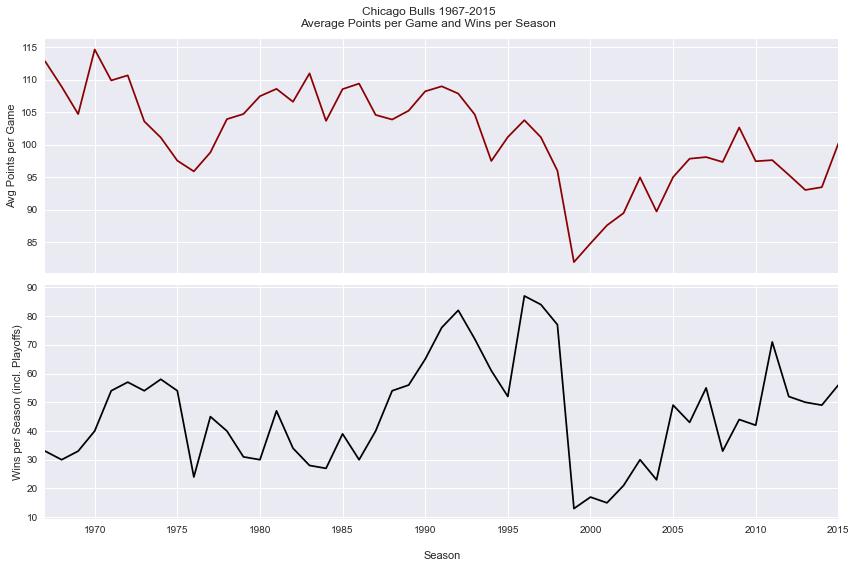

In [16]:
x_val = stats_table["year_id"]
wins = stats_table["W"]
pts = stats_table["pts_pg"]
loc = plticker.MultipleLocator(base=5)

plt.style.use("seaborn")

fig, (ax1, ax2) = plt.subplots(2, figsize=(12,8), sharex=True)
fig.suptitle("Chicago Bulls 1967-2015\nAverage Points per Game and Wins per Season")
ax1.xaxis.set_major_locator(loc)
ax1.set_xlim(1967, 2015)
ax1.plot(x_val, pts, color="darkred")
ax1.set_ylabel("Avg Points per Game")
ax2.plot(x_val, wins, color="black")
ax2.set_xlabel("\nSeason")
ax2.set_ylabel("Wins per Season (incl. Playoffs)")

plt.tight_layout()
fig.savefig("output_data/Bulls_Wins_Points.png")

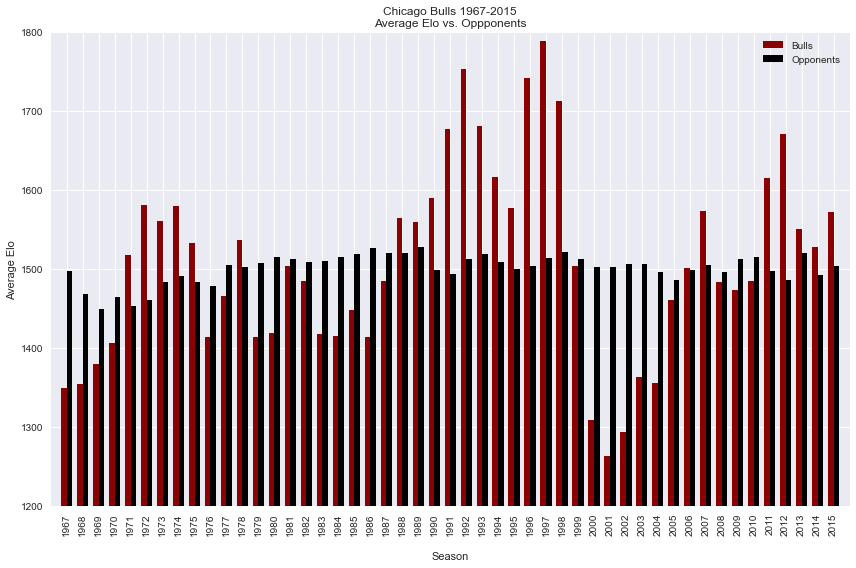

In [17]:
labels = stats_table["year_id"]
elo = stats_table["elo_pg"]
opp_elo = stats_table["opp_elo_pg"]
loc = plticker.MultipleLocator(base=5)
x_scale = np.arange(len(labels))
width = 0.35

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(12,8))
bars1 = ax.bar(x_scale - width/2, elo, width, color="darkred", label="Bulls")
bars2 = ax.bar(x_scale + width/2, opp_elo, width, color="black", label="Opponents")
ax.set_xlim(-1, 49)
ax.set_ylim(1200, 1800)
ax.set_ylabel("Average Elo")
ax.set_xlabel("\nSeason")
ax.set_title("Chicago Bulls 1967-2015\nAverage Elo vs. Oppponents")
ax.set_xticks(x_scale)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
fig.savefig("output_data/Bulls_Elo_vs_Opponents.png")

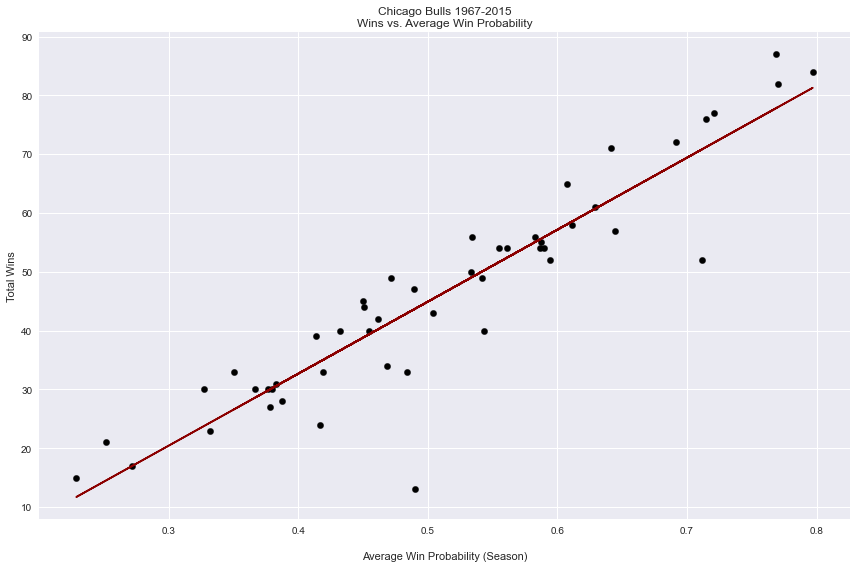

In [18]:
forecast_x = stats_table["avg_win_prob"]
forecast_y = stats_table["W"]

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(forecast_x, forecast_y, s=40, color="black")
(slope, intercept, rvalue, pvalue, stderr) = linregress(forecast_x, forecast_y)
regress_values = forecast_x * slope + intercept
plt.plot(forecast_x, regress_values,"darkred")
plt.xlabel("\nAverage Win Probability (Season)")
plt.ylabel("Total Wins")
plt.title("Chicago Bulls 1967-2015\nWins vs. Average Win Probability")

fig.tight_layout()
fig.savefig("output_data/Bulls_Wins_vs_Prob.png")

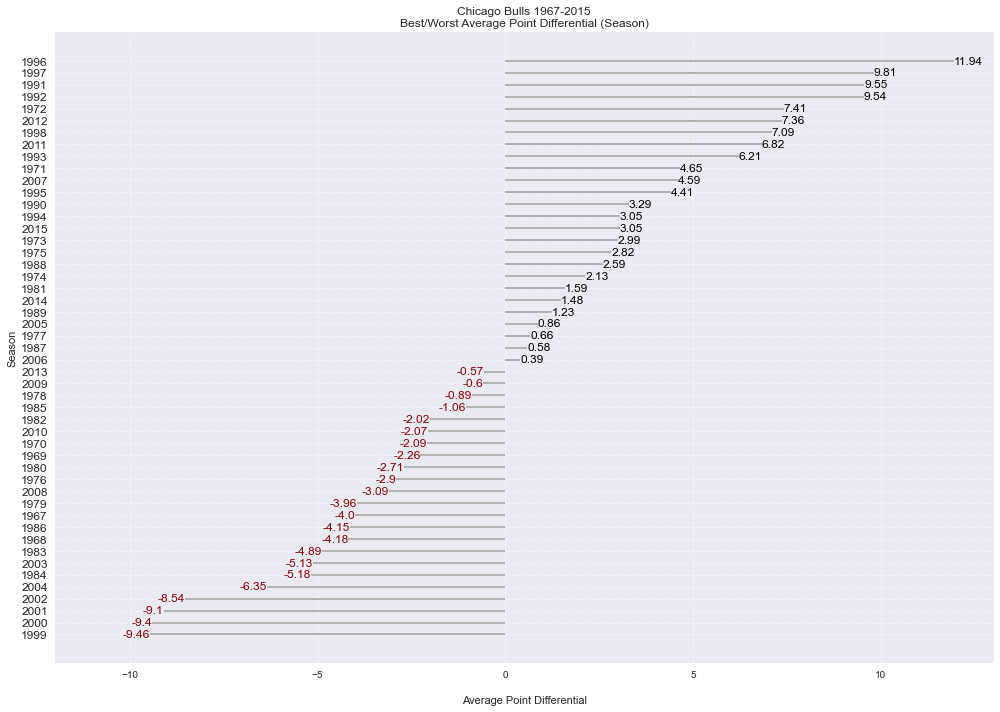

In [19]:
stats_table.sort_values("pt_diff_pg", inplace=True)
stats_table.reset_index(inplace=True)

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(14,10))
plt.hlines(y=stats_table.index, xmin=0, xmax=stats_table["pt_diff_pg"], color="darkgrey")
for x, y, z in zip(stats_table["pt_diff_pg"], stats_table.index, stats_table["pt_diff_pg"]):
    t = plt.text(x, y, z, horizontalalignment="right" if x < 0 else "left", verticalalignment="center", fontdict={"color":"darkred" if x < 0 else "black", "size":12})

plt.yticks(stats_table.index, stats_table["year_id"], fontsize=12)
plt.xlabel("\nAverage Point Differential")
plt.ylabel("Season")
plt.title("Chicago Bulls 1967-2015\nBest/Worst Average Point Differential (Season)")
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-12, 13)

fig.tight_layout()
fig.savefig("output_data/Bulls_Point_Differentials.png")